# Moldelowanie Układów Przepływowych @AGH (Lab 1, 29.X.2025 r.)
Sylwester Arabas (sylwester.arabas@agh.edu.pl)

## 1. analiza wymiarowa kodu Pythona przy użyciu [pint](https://pint.readthedocs.io/)

In [ ]:
!pip install pint

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.5/305.5 kB 11.9 MB/s eta 0:00:00


In [ ]:
!pip install open_atmos_jupyter_utils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.4 MB/s eta 0:00:00


In [ ]:
import pint
from scipy import constants as const
import matplotlib.pyplot as plt
import numpy as np
from open_atmos_jupyter_utils import show_plot

In [ ]:
si = pint.UnitRegistry()




In [ ]:
100 * si.m + 100 * si.cm

<Quantity(101.0, 'meter')>

In [ ]:
result_m = 100 * si.m + 100 * si.cm

In [ ]:
result_m.to_base_units()

<Quantity(101.0, 'meter')>

In [ ]:
result_m.to(si.cm)

<Quantity(10100.0, 'centimeter')>

In [ ]:
def rho(p, T, R):
  return p / (R * T)
# pV = nRT
# M = m/n,    rho = m/V
# rho = m / nRT * p = M * p / RT

M_dryair = 28.966 * si.kg/ si.kmol
R = 8.314 * si.J / (si.kg * si.K)
Rd = const.R / M_dryair * si.J / si.K / si.mol
Rd = Rd.to_base_units() # trzeba to przekonwertować

print(Rd.to_base_units)

<bound method PlainQuantity.to_base_units of <Quantity(287.04214, 'meter ** 2 / second ** 2 / kelvin')>>


In [ ]:
rho1 = rho(1013*si.hPa, 296*si.K, Rd)
print(rho1.to_base_units())

1.192263024877629 kilogram / meter ** 3


In [ ]:
si.setup_matplotlib()

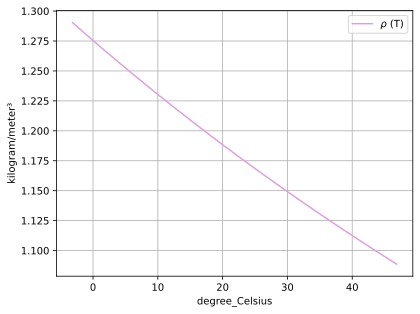

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

plt.plot(T := np.linspace(270,320,50)*si.K,
         rho(p=1000*si.hPa, T=T, R=Rd ).to_base_units(),
         label=r'$\rho$ (T)',
         color = 'plum')
plt.gca().xaxis.set_units(si.celsius)
plt.legend()
plt.grid(True)
show_plot('wgraficewektorowej.pdf')
plt.show()

In [ ]:
def rho(p, R, T):
    return p / (R * T)

R_str = constants.R * si.joule / si.kelvin / si.mole

Md = 28.966 * si.gram / si.mole
"""
[Gatley et al. 2008](https://doi.org/10.1080/10789669.2008.10391032)
"""

rho_air = rho(
    p=1000 * si.hPa,
    R=R_str / Md,
    T=300 * si.K
)

print(f"{rho_air.to_base_units():.3g} = {rho_air.to(si.g / si.cm**3):.3g}\n")

1.16 kilogram / meter ** 3 = 0.00116 gram / centimeter ** 3



In [ ]:
buggy_rho = rho(
    p=1000 * si.hPa,
    R=R_str * Md,
    T=300 * si.K
)
buggy_rho.check("[density]")

False

In [ ]:
# try this:
# Md + R_str

## 2. automatyczny opis osi używając pint i matplotlib

In [ ]:
def equilibrium_vapour_pressure(T):
    """ wzór Tetensa (https://en.wikipedia.org/wiki/Tetens_equation) """
    TC = T - constants.zero_Celsius * si.K
    return .61078 * si.kPa * np.exp(17.27 * TC / (237.3 * si.K + TC))

In [ ]:
import numpy as np
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot
si.setup_matplotlib()

In [ ]:
def plot(fig):
    T = np.linspace(280, 320) * si.K
    fig.gca().plot(T, equilibrium_vapour_pressure(T), label='ciśnienie równowagowe')
    fig.legend()
    fig.gca().grid()

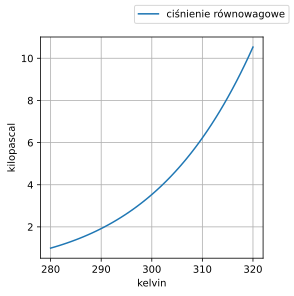

In [ ]:
fig = pyplot.figure(figsize=(4,4))
plot(fig)
show_plot(fig=fig)

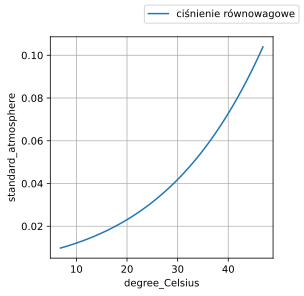

In [ ]:
fig = pyplot.figure(figsize=(4,4))
plot(fig)
fig.gca().xaxis.set_units(si.celsius)
fig.gca().yaxis.set_units(si.atm)
show_plot(fig=fig)

## 3. znajdowanie temperatury wrzenia wody w zależności od ciśnienia atmosferycznego

In [ ]:
def bisect(*, fun, x_min, x_max, atol):
    """ https://en.wikipedia.org/wiki/Bisection_method """
    fmin, fmax = fun(x_min), fun(x_max)
    while True:
        mid = (x_min + x_max) / 2
        if abs(x_max - x_min) <= atol:
            break
        fmid = fun(mid)
        if (fmid * fmin > 0):
            x_min, fmin = mid, fmid
        else:
            x_max, fmax = mid, fmid
    return mid

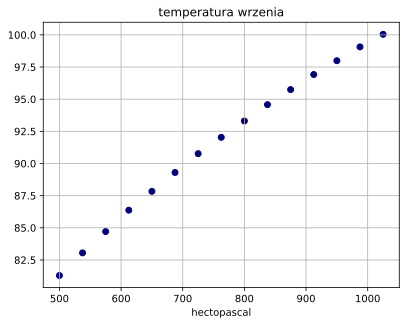

In [ ]:
pyplot.gca().yaxis.set_units(si.celsius)
pyplot.title('temperatura wrzenia')
for p_atm in np.linspace(500, 1025, 15) * si.hPa:
    T_boil = bisect(
        fun=lambda T: equilibrium_vapour_pressure(T) - p_atm,
        x_min=300 * si.K,
        x_max=400 * si.K,
        atol=.1 * si.K
    )
    pyplot.scatter(p_atm, T_boil, color='navy')
pyplot.grid()
show_plot()